# Focus on HR

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import sys
sys.path.append('../Functions')
import CleanUp as p

In [2]:
file_path = '../Data/DM2425_ABCDEats_DATASET.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path)
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
import sys
import os

# Add parent directory (one level up) to the path
sys.path.append(os.path.abspath(os.path.join('..')))

# Now you should be able to import from the Functions folder
from Functions.CleanUp import cleanUp

## 1 cleanUp()

In [4]:
# Now you can call the function
df, columns_dict = cleanUp(df)


-----------looking for incostisencies -----------
There are repeated values in the dataset
      customer_id customer_region  customer_age  vendor_count  product_count  \
20855  742ca068fc            8550          20.0             1              2   
20907  742ca068fc            8550          20.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  \
20855         0         35.0          35          -           CARD   
20907         0         35.0          35          -           CARD   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
20855           0.0        0.0            0.0       0.0                 0.0   
20907           0.0        0.0            0.0       0.0                 0.0   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
20855          0.0           0.0          0.0         0.0          0.0   
20907          0.0           0.0          0.0         0.0          0.0 

## extract the columns list

In [5]:
key = columns_dict.keys()
print(key)
new_features_list = columns_dict['new_features_list']
numerical_columns = columns_dict['numerical_columns']
CUI_col = columns_dict['CUI_col']
HR_col = columns_dict['HR_col']
DOW_col = columns_dict['DOW_col']

dict_keys(['non_numerical_columns', 'new_features_list', 'numerical_columns', 'CUI_col', 'HR_col', 'DOW_col'])


In [6]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,customer_city,used_promo,order_count,avg_product_by_order,delta_day_order,tot_value_cui,order_freq,value_freq,product_freq,avg_order_value,avg_product_value
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,True,2,2.5,2.0,28.88,1.000000,14.440,2.500000,5.776,5.776
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,8,True,2,1.0,2.0,19.21,1.000000,9.605,1.000000,9.605,9.605
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,True,2,1.0,2.0,9.20,1.000000,4.600,1.000000,4.600,4.600
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,4,True,2,1.5,3.0,31.56,0.666667,10.520,1.000000,10.520,10.520
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,No_Promo,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,False,2,2.5,3.0,55.44,0.666667,18.480,1.666667,11.088,11.088


# 1 Descriptive Statistics for Hour Feature


In [7]:
# Overall statistics of the hours columns
df[HR_col].describe().T

,count,mean,std,min,25%,50%,75%,max
HR_0,31888.0,0.048702,0.312971,0.0,0.0,0.0,0.0,15.0
HR_1,31888.0,0.053845,0.317013,0.0,0.0,0.0,0.0,14.0
HR_2,31888.0,0.063190,0.351498,0.0,0.0,0.0,0.0,12.0
HR_3,31888.0,0.118759,0.500862,0.0,0.0,0.0,0.0,11.0
HR_4,31888.0,0.101700,0.437493,0.0,0.0,0.0,0.0,14.0
HR_5,31888.0,0.081943,0.358705,0.0,0.0,0.0,0.0,7.0
HR_6,31888.0,0.069681,0.329461,0.0,0.0,0.0,0.0,8.0
HR_7,31888.0,0.076800,0.377700,0.0,0.0,0.0,0.0,15.0
HR_8,31888.0,0.131899,0.635582,0.0,0.0,0.0,0.0,52.0
HR_9,31888.0,0.233912,0.724906,0.0,0.0,0.0,0.0,23.0


# 2 distribution of orders across the 24-hour period

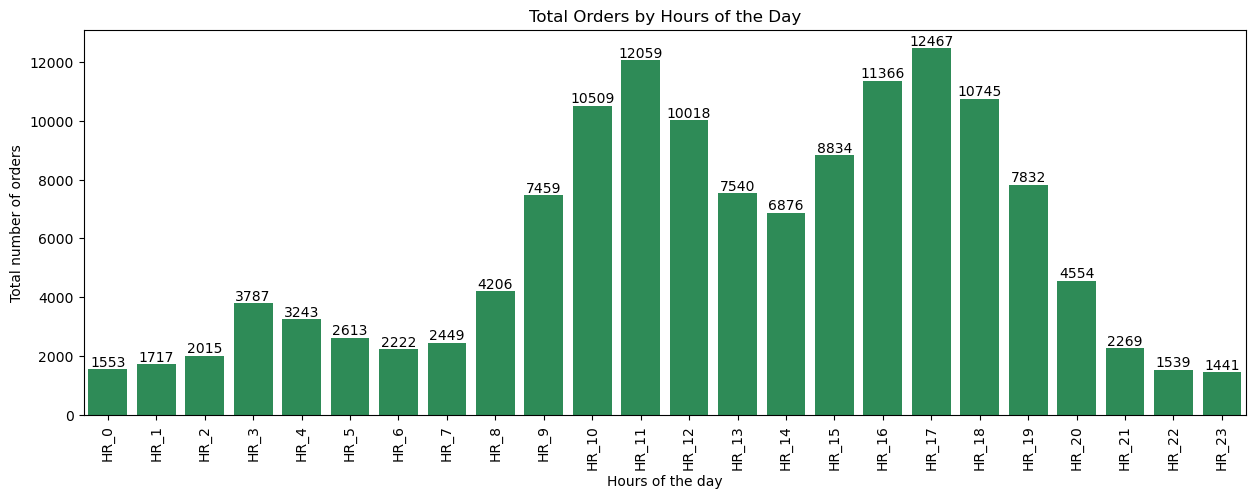

In [8]:
df[HR_col].sum().plot(kind='bar')
plt.title('Total Orders by Hours of the Day')
plt.xlabel('Hours of the day')

# Add value labels on top of each bar
for index, value in enumerate(df[HR_col].sum()):
    plt.text(index, value, str(int(value)), ha='center', va='bottom')
plt.ylabel('Total number of orders')
bars = plt.bar(df[HR_col].columns, df[HR_col].sum(), color='seagreen')
#df[HR_col].sum().plot(kind='line', color='peru', marker='o')
plt.gcf().set_size_inches(15, 5)  # Set the figure size
plt.show()

As we can see, the costumers tend to order more in the morning and in the evening schedule. The most popular time is 11am am and 6pm
Besides that, there is a significant drop in the number of orders placed at dawn and late night.
At lunch time, there is a low decrease in the number of orders placed.

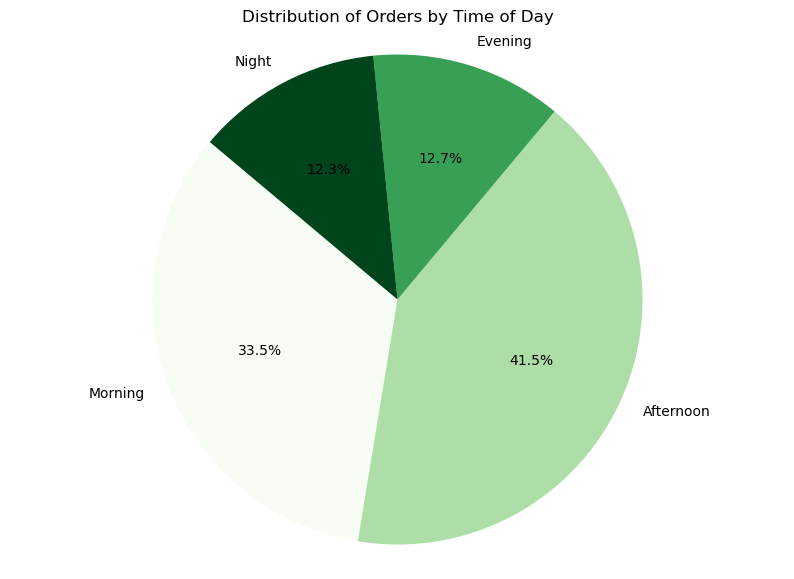

In [9]:
#lets dividie the hours in 4 categories: Morning, Afternoon, Evening and Night. We did it by loocking at the graph above.
morning_hours = [f'HR_{i}' for i in range(7, 13)]  # 7am to 12pm
afternoon_hours = [f'HR_{i}' for i in range(13, 19)] # 1pm to 6pm
evening_hours = [f'HR_{i}' for i in range(19, 24)]   # 7pm to 11pm
night_hours = [f'HR_{i}' for i in range(0, 7)]        # 12am to 6am

# Calculate the total orders for each time category
morning_orders = df[morning_hours].sum().sum()
afternoon_orders = df[afternoon_hours].sum().sum()
evening_orders = df[evening_hours].sum().sum()
night_orders = df[night_hours].sum().sum()

# Data for the pie chart
time_categories = ['Morning', 'Afternoon', 'Evening', 'Night']
orders = [morning_orders, afternoon_orders, evening_orders, night_orders]

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(orders, labels=time_categories, autopct='%1.1f%%', startangle=140, colors=plt.cm.Greens(np.linspace(0, 1, len(orders))))
plt.title('Distribution of Orders by Time of Day')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

We can clearly see that most of the orders are mad in the afternoon and in the morning period.

now lets see the variability of each time period. 

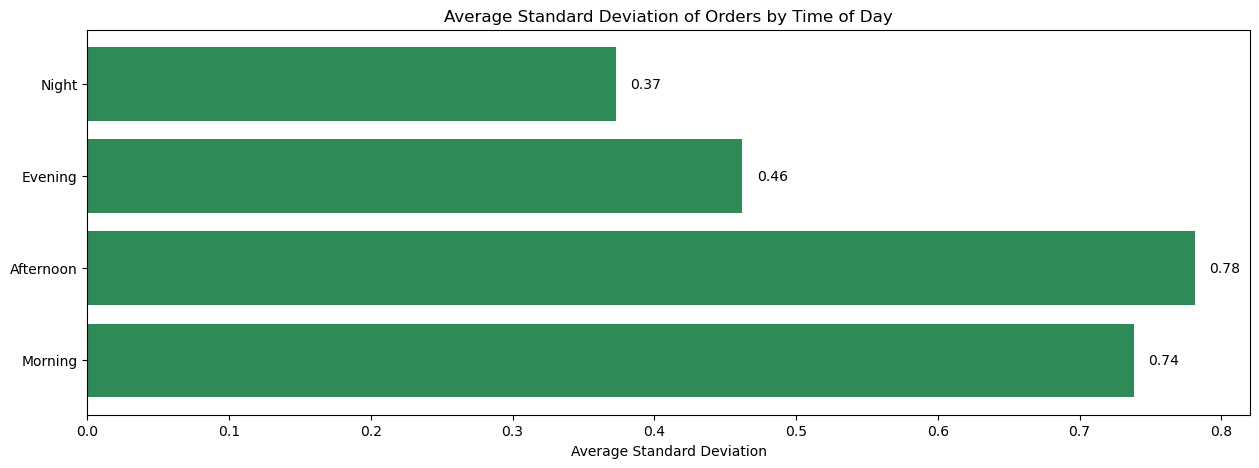

In [10]:
# Calculate the standard deviation for each time category
morning_std = df[morning_hours].std().mean()
afternoon_std = df[afternoon_hours].std().mean()
evening_std = df[evening_hours].std().mean()
night_std = df[night_hours].std().mean()

# Build a horizontal bar chart
time_categories = ['Morning','Afternoon', 'Evening', 'Night']
std_devs = [morning_std, afternoon_std, evening_std, night_std]


plt.figure(figsize=(15, 5))
bars = plt.barh(time_categories, std_devs, color='seagreen')
# Add the standard deviation values to the bars
for bar, std_dev in zip(bars, std_devs):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{std_dev:.2f}', va='center')

plt.xlabel('Average Standard Deviation')
plt.title('Average Standard Deviation of Orders by Time of Day')
plt.show()

we can also see that the periods with more orders are the ones that also have the higher variability. 

Lets see the cumulative graphic of the orders by time of the day.

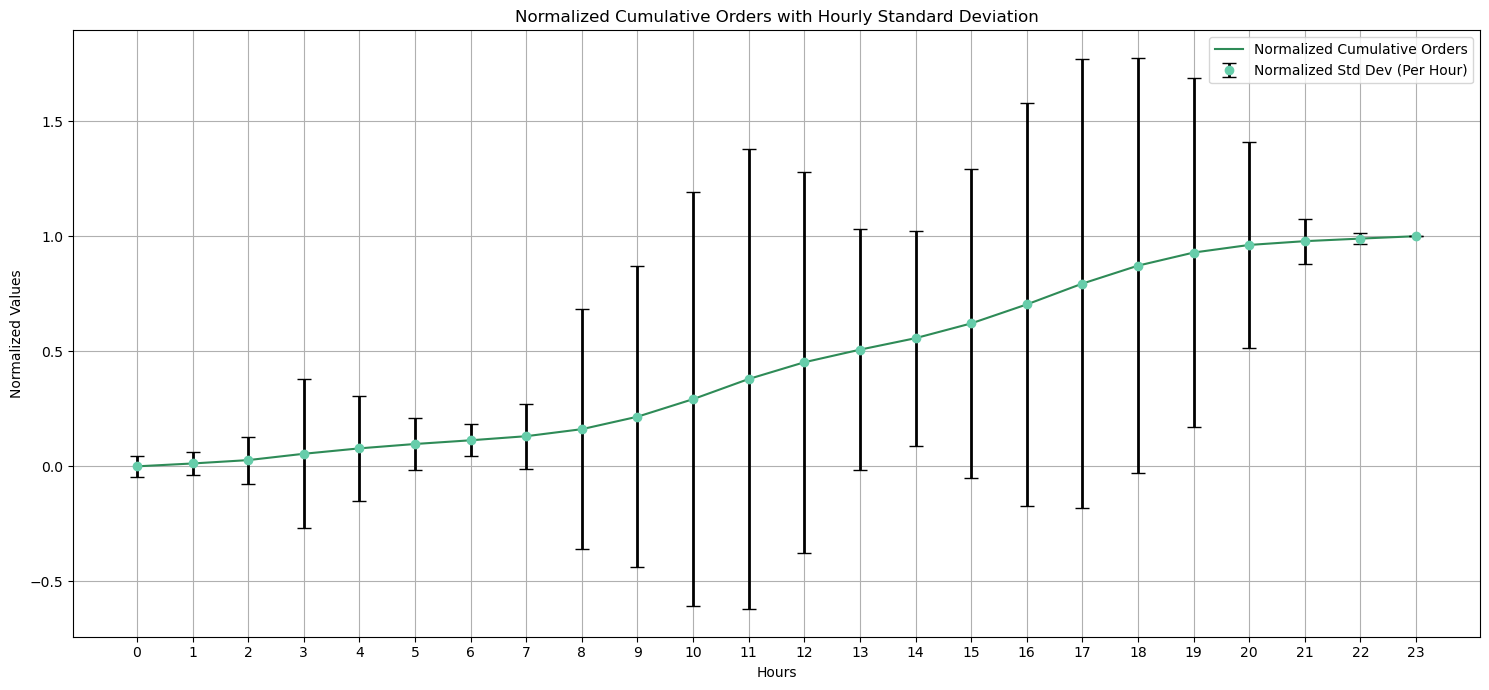

In [11]:
# Total sum of orders per hour and then the cumulative sum
orders_sum_cumulative = df[HR_col].sum().cumsum()

# Standard deviation per hour (non-cumulative)
std_dev = df[HR_col].std()

# Normalize the cumulative sum and standard deviation (Min-Max normalization)
scaler = MinMaxScaler()
orders_sum_cumulative_normalized = scaler.fit_transform(orders_sum_cumulative.values.reshape(-1, 1)).flatten()
std_dev_normalized = scaler.fit_transform(std_dev.values.reshape(-1, 1)).flatten()

# Hours array (0 to 23)
hours = np.arange(24)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 7)) 

# Plot the normalized cumulative orders
ax.plot(hours, orders_sum_cumulative_normalized, color='seagreen', label='Normalized Cumulative Orders', )

# Add error bars representing the normalized non-cumulative standard deviation at each hour
ax.errorbar(hours, orders_sum_cumulative_normalized, yerr=std_dev_normalized, fmt='o', color='mediumaquamarine', 
            ecolor='black', elinewidth=2, capsize=5, label='Normalized Std Dev (Per Hour)')

# Customize the plot
plt.title('Normalized Cumulative Orders with Hourly Standard Deviation')
plt.xlabel('Hours')
plt.ylabel('Normalized Values')
plt.legend()
plt.xticks(hours)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


General trend: Sales start at a low level at the beginning of the day (HR_0), increase slowly during the first few hours, and from a certain point (around HR_10 to HR_11), the growth rate accelerates significantly until HR_19. After that, the growth slows down and eventually stabilizes around HR_22.

Period of greatest growth: The graph indicates that sales start to grow more rapidly from HR_10, with the sharpest increase between HR_10 and HR_19. This suggests that these are the peak sales hours.

Stabilization: After HR_20, the growth in sales begins to slow down, with the values stabilizing until the end of the day, indicating that the sales volume reaches a plateau.

Initial behavior: In the early hours of the day (HR_0 to HR_6), the growth in sales is quite slow, which may indicate a low volume of activity or sales during the first hours.

Conclusion: This graph suggests a typical sales pattern throughout a day, with a relatively quiet morning, a significant increase in the afternoon, and a slowdown and stabilization in the evening. This could be useful for optimizing operating hours or promotional campaigns during peak activity periods.



# 4. Hours vs Cities

In [18]:
# Group by 'customer_region' and sum the hour columns, displaying all columns
pd.set_option('display.max_columns', None)
city_hour_sum = df.groupby('customer_city')[HR_col].sum()

# Display the resulting table
city_hour_sum

,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_city,,,,,,,,,,,,,,,,,,,,,,,,
2,516,391,268,161,88,72,103,413,1206,1598,2552,5841,5773,3869,2740,2467,2884,4950,6229,5788,3730,1790,987,738
4,135,97,42,14,13,57,212,457,1096,2719,4031,2949,2074,2002,2733,5304,7772,7120,4314,1935,735,406,282,179
8,856,1177,1635,3468,3022,2388,1824,1523,1821,3032,3782,3154,2079,1612,1345,1014,676,380,193,102,88,67,261,485


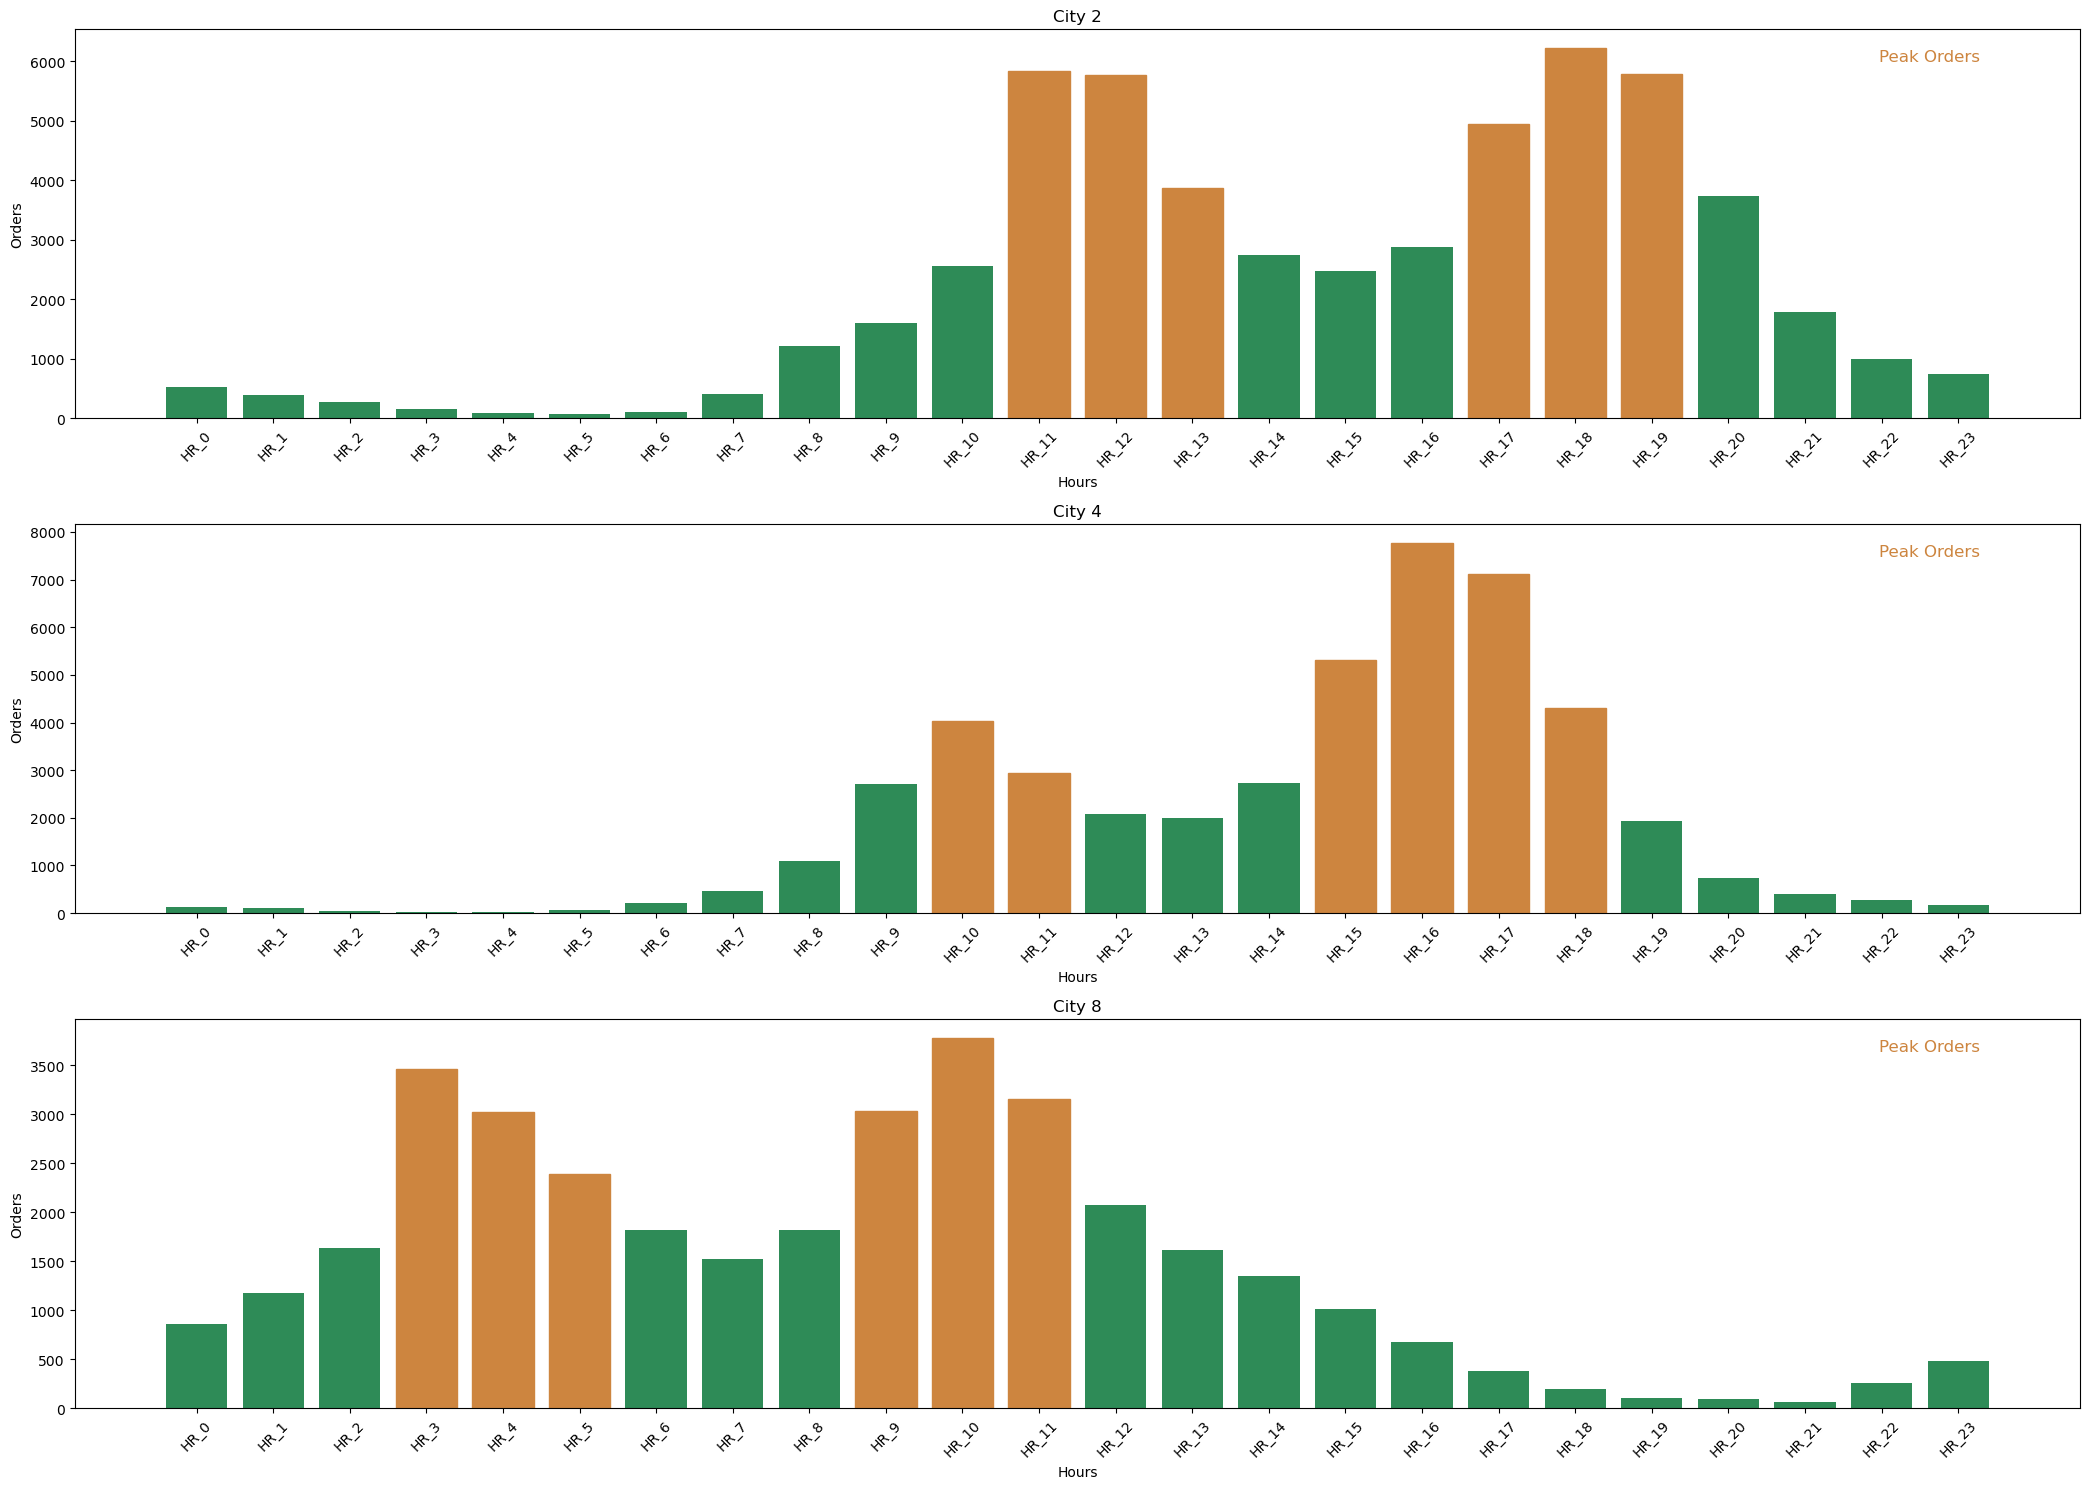

In [20]:
# Define the number of regions and subplots
num_cities = len(HR_col)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(21, 15))  

# Ensure a clean layout for the chart
axes = axes.flatten()  # Flatten axes for easier iteration

# Plot histograms of each City in its respective subplot
for idx, (City, data) in enumerate(city_hour_sum.iterrows()):
    # Get the top 6 order hours
    top_6_hours = data.nlargest(6).index

    # Plot all bars in "mediumaquamarine" color
    bars = axes[idx].bar(city_hour_sum.columns, data.values, color='seagreen')

    # Highlight the top 6 order hours in "Peru" color
    for bar, hour in zip(bars, city_hour_sum.columns):
        if hour in top_6_hours:
            bar.set_color('peru')
    axes[idx].set_title(f'City {City}')
    axes[idx].set_xlabel('Hours')
    axes[idx].set_ylabel('Orders')
    # Labels in the top corner saying "Peak Orders" with the color "Peru"
    axes[idx].text(0.95, 0.95, 'Peak Orders', color='peru', fontsize=12, ha='right', va='top', transform=axes[idx].transAxes)

    # Rotate x-axis values for readability
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Since our goal is not to count the number of orders per region, but rather to examine their distribution over the hours of the day, the focus will be the distributions and not the absolute values.

From the analysis of the figures, we can observe that the region where the customer is located significantly influences their purchasing habits, particularly in terms of the times when they place their orders.

In regions 2630, 2490, and 2440, we see that the distribution follows the general trend previously presented, with the majority of orders placed around 11 a.m. and 5 p.m.

Regions 4660 and 4140 also align with the general distribution but show a drop in order volume during the late morning (around 11 a.m.).

Regions 8370 and 8670 exhibit a similar pattern, with a focus on orders placed during the dawn, peaking at 3 a.m., and again in the morning, with a peak at 10 a.m. During lunch and dinner times, the number of orders is significantly lower.

Finally, in region 8550, although the dataset is not large enough to draw definitive conclusions, the distribution reveals a single peak in order activity at 3 a.m.





In [21]:
df.groupby('customer_city')['customer_age'].agg(['mean', 'median'])

,mean,median
customer_city,,
2,27.484900,26.0
4,27.535451,26.0
8,27.517752,26.0


As we can see, the average and median ages for each region are identical, so the differences in the distribution of order times are likely not related to the age of customers in each region, but rather to others cultural factors specific to each region.

We can also observe the different purchasing patterns throughout various periods of the day across different regions using the pie charts above.

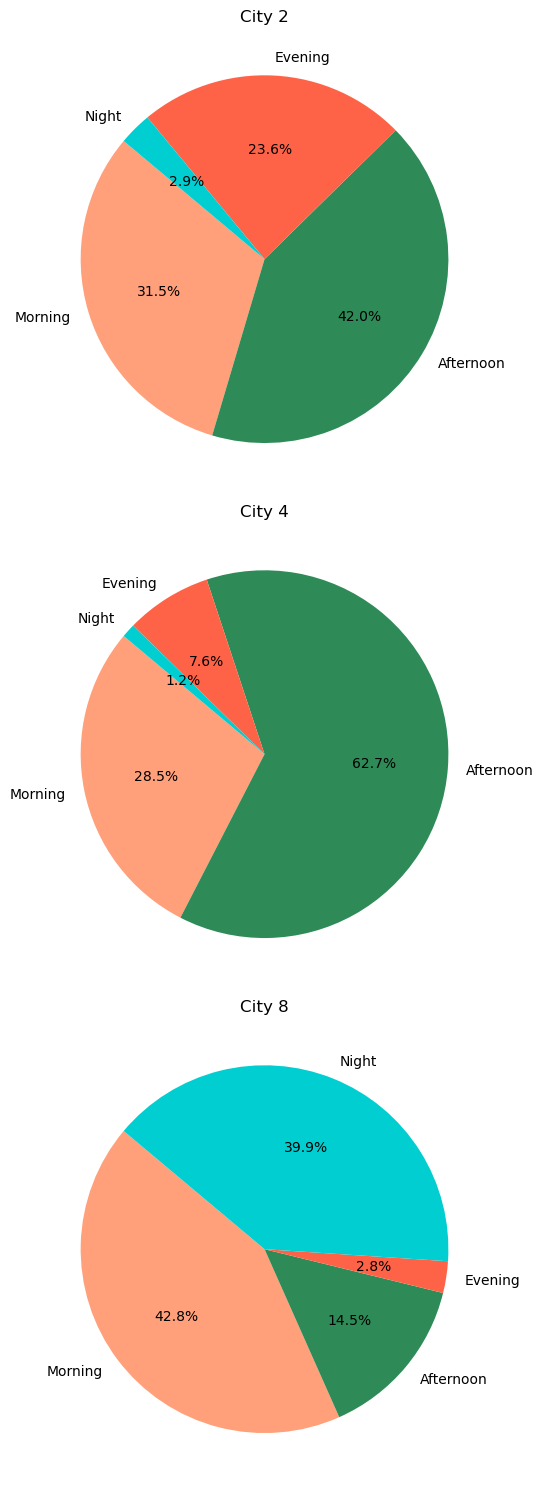

In [22]:
# Number of regions and subplots
num_city= len(city_hour_sum)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(21, 15))  

# Ensure a clean layout for the chart
axes = axes.flatten()  # Flatten axes for easier iteration

# Calculate the total orders for each time category for each region
for idx, (City, data) in enumerate(city_hour_sum.iterrows()):
    morning_orders = data[morning_hours].sum()
    afternoon_orders = data[afternoon_hours].sum()
    evening_orders = data[evening_hours].sum()
    night_orders = data[night_hours].sum()

    # Data for the pie chart
    orders = [morning_orders, afternoon_orders, evening_orders, night_orders]

    # Plotting the pie chart
    axes[idx].pie(orders, labels=['Morning', 'Afternoon', 'Evening', 'Night'], autopct='%1.1f%%', 
                  startangle=140, colors=['lightsalmon','seagreen','tomato','darkturquoise'])
    axes[idx].set_title(f'City {City}')

plt.tight_layout()
plt.show()

# 5. Hour vs. Customer Age

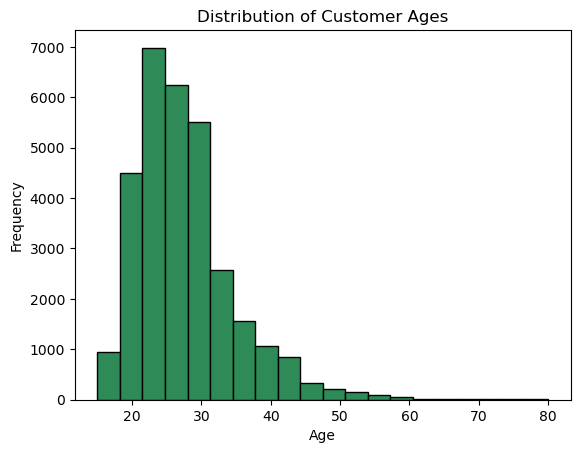

In [23]:
# See the distribution of the customer ages
df['customer_age'].plot(kind='hist', bins=20, color='seagreen', edgecolor='black')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.show()

We can see that our customer ages are mainly between 20 to 50 years old

In [26]:
df.groupby('customer_age')[HR_col].sum()

,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_age,,,,,,,,,,,,,,,,,,,,,,,,
15.0,1,1,3,2,4,3,0,5,4,4,6,8,9,4,4,2,3,4,14,5,0,2,0,0
16.0,2,7,5,19,21,7,8,7,13,18,33,34,18,15,10,16,37,29,31,22,9,7,3,3
17.0,11,16,19,22,18,12,18,29,72,45,70,86,81,55,61,72,83,117,68,51,40,13,15,11
18.0,21,19,35,76,67,50,35,41,62,109,203,240,189,127,112,140,233,228,196,130,80,38,31,15
19.0,62,61,62,97,102,75,77,90,127,269,339,393,300,221,195,276,329,402,328,261,131,52,63,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76.0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,1,0,0,0,0,0
77.0,0,0,0,0,0,5,1,0,0,0,2,2,0,2,1,0,5,1,2,2,0,0,0,0
78.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


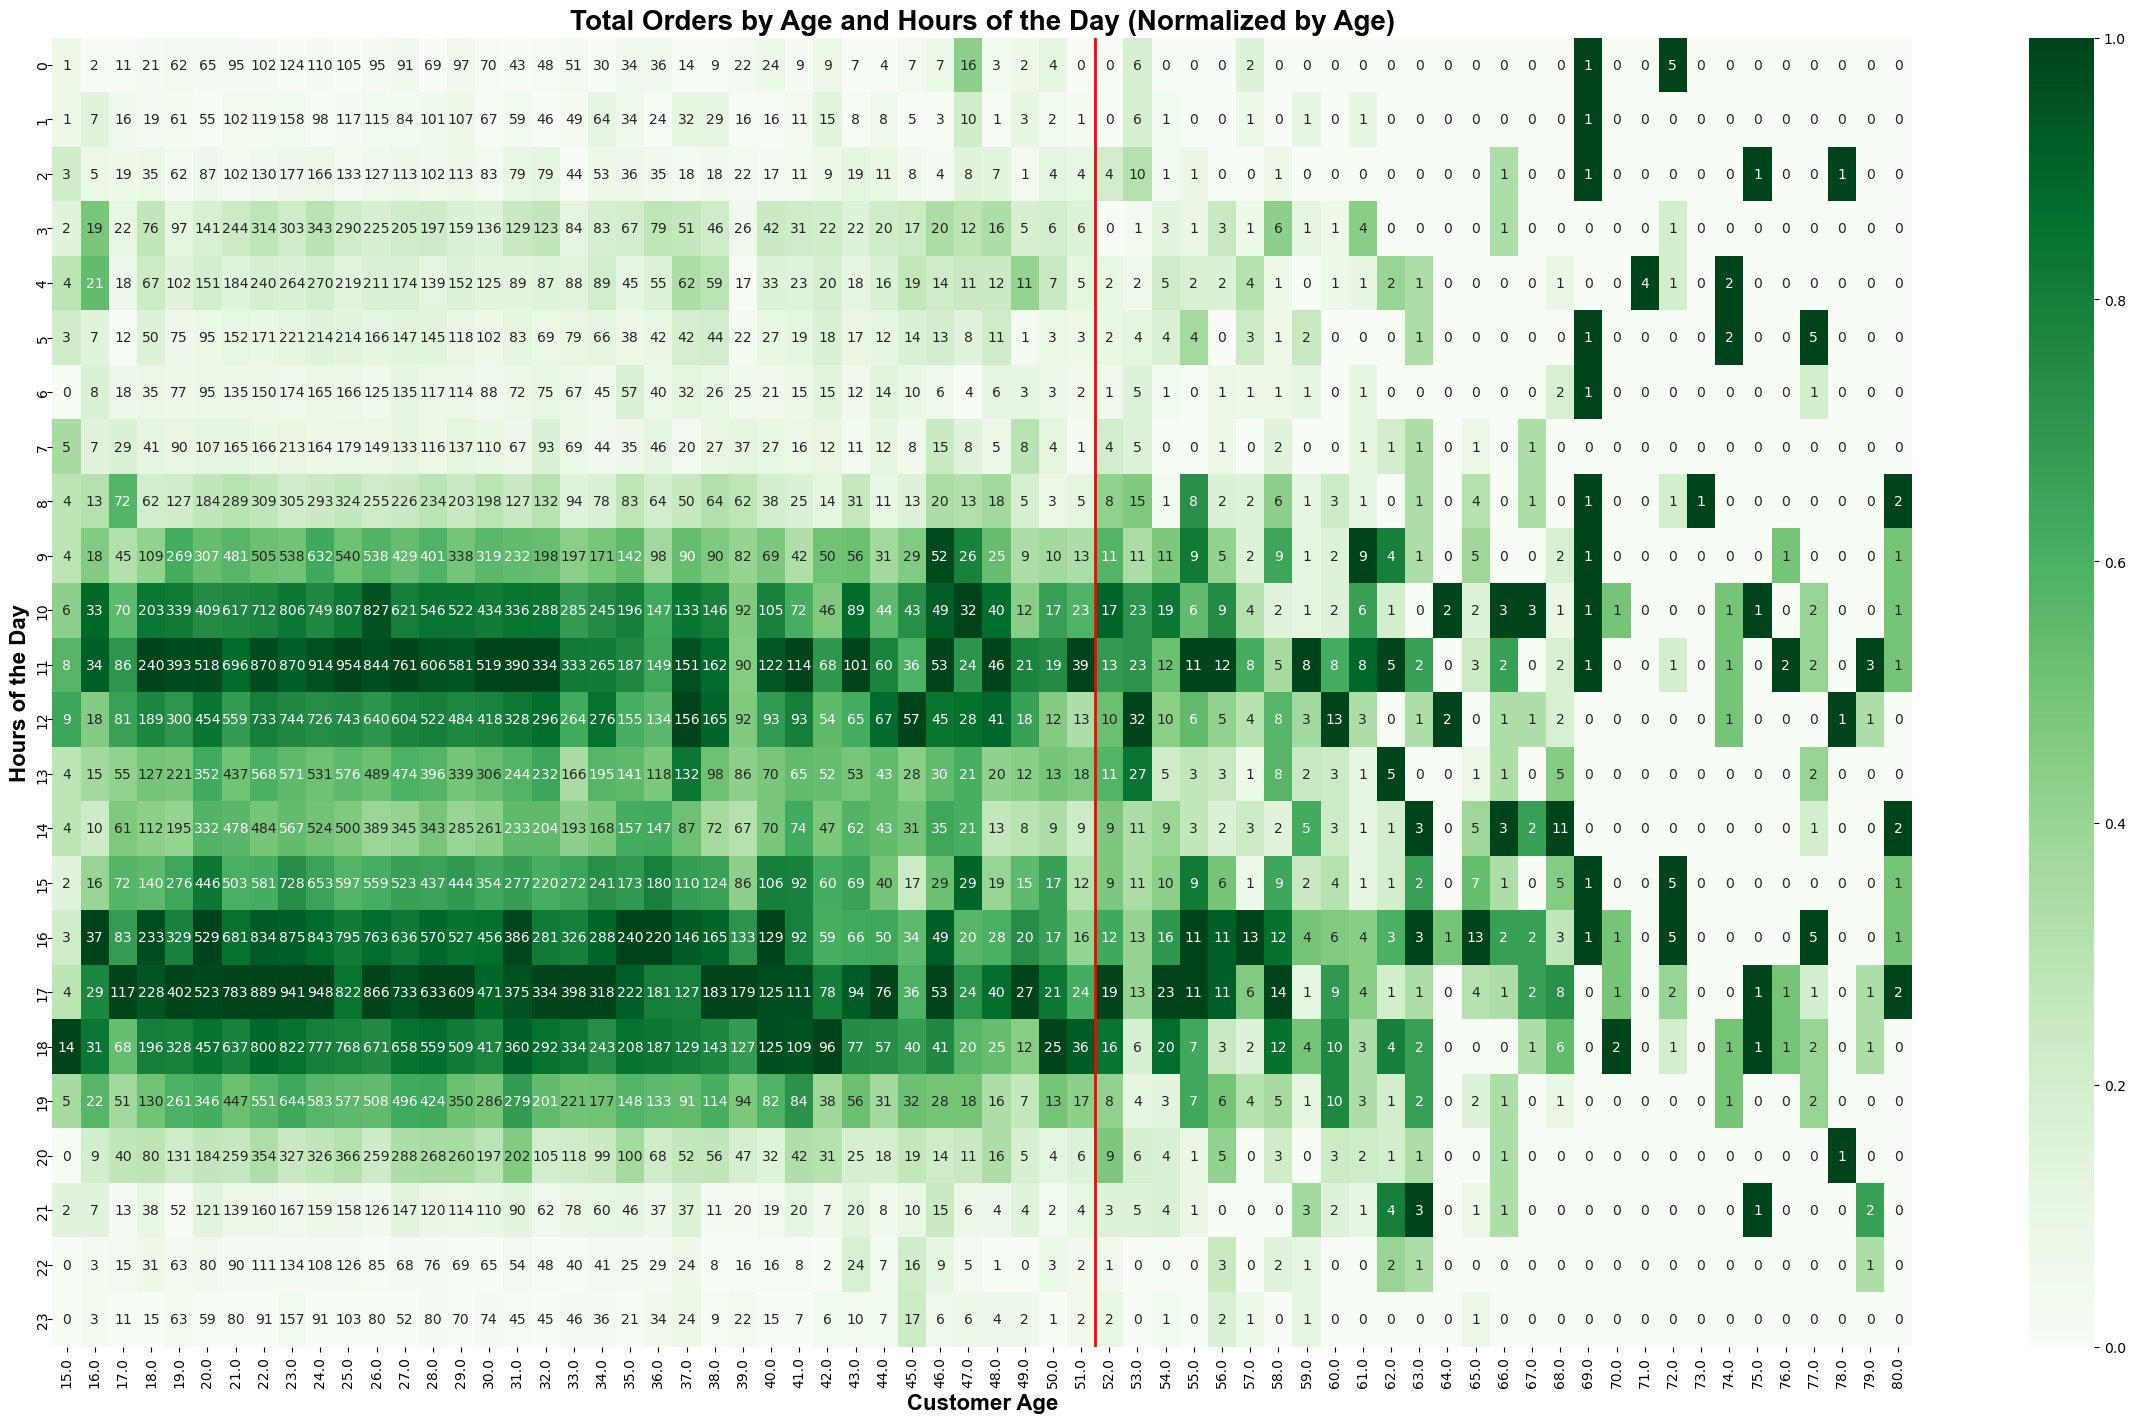

In [27]:
heatmap_data = df.groupby('customer_age')[HR_col].sum().T

# Create a scaler instance for Min-Max normalization
scaler = MinMaxScaler()
# Normalize the 'data' dataframe (column-wise normalization)
heatmap_data_normalized = pd.DataFrame(scaler.fit_transform(heatmap_data), columns=heatmap_data.columns, index=heatmap_data.index)

# Creating the heatmap with normalized data, but using the real values for annotations
plt.figure(figsize=(30, 17))
# Create the heatmap
ax = sns.heatmap(heatmap_data_normalized, cmap='Greens', annot=heatmap_data, fmt='g', annot_kws={"size": 10, "ha": 'center', "va": 'center'})

# Add a thick red vertical line at x = 52
ax.axvline(x=52 - 15, color='red', linewidth=2)

# Set the title and axis labels
plt.title('Total Orders by Age and Hours of the Day (Normalized by Age)', 
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'fontname': 'Arial'})

plt.xlabel('Customer Age', 
           fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Arial'})

plt.ylabel('Hours of the Day', 
           fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Arial'})


ytick_positions = np.arange(len(heatmap_data.index)) + 0.5  # 0.5 centers the tick in each row
# Set custom y-tick positions and labels
ax.set_yticks(ytick_positions)  # Set y-tick positions
ax.set_yticklabels(heatmap_data.index.str.replace('HR_', ''), ha='center')  # Set y-tick labels

plt.show()

We can observe that the age of the customers does not affect the time they place their orders, as the age groups have an identical relative distribution, as we can see on the gradient.

The only deviation we see, is the age of 16 where it seems customers have a high peak of ordering at 4a.m and 4a.m

From the age of 65 onwards, we can observe that customers place more orders during the dawn. However, since the data is limited and the sample size for this age group is small, we cannot draw definitive conclusions.

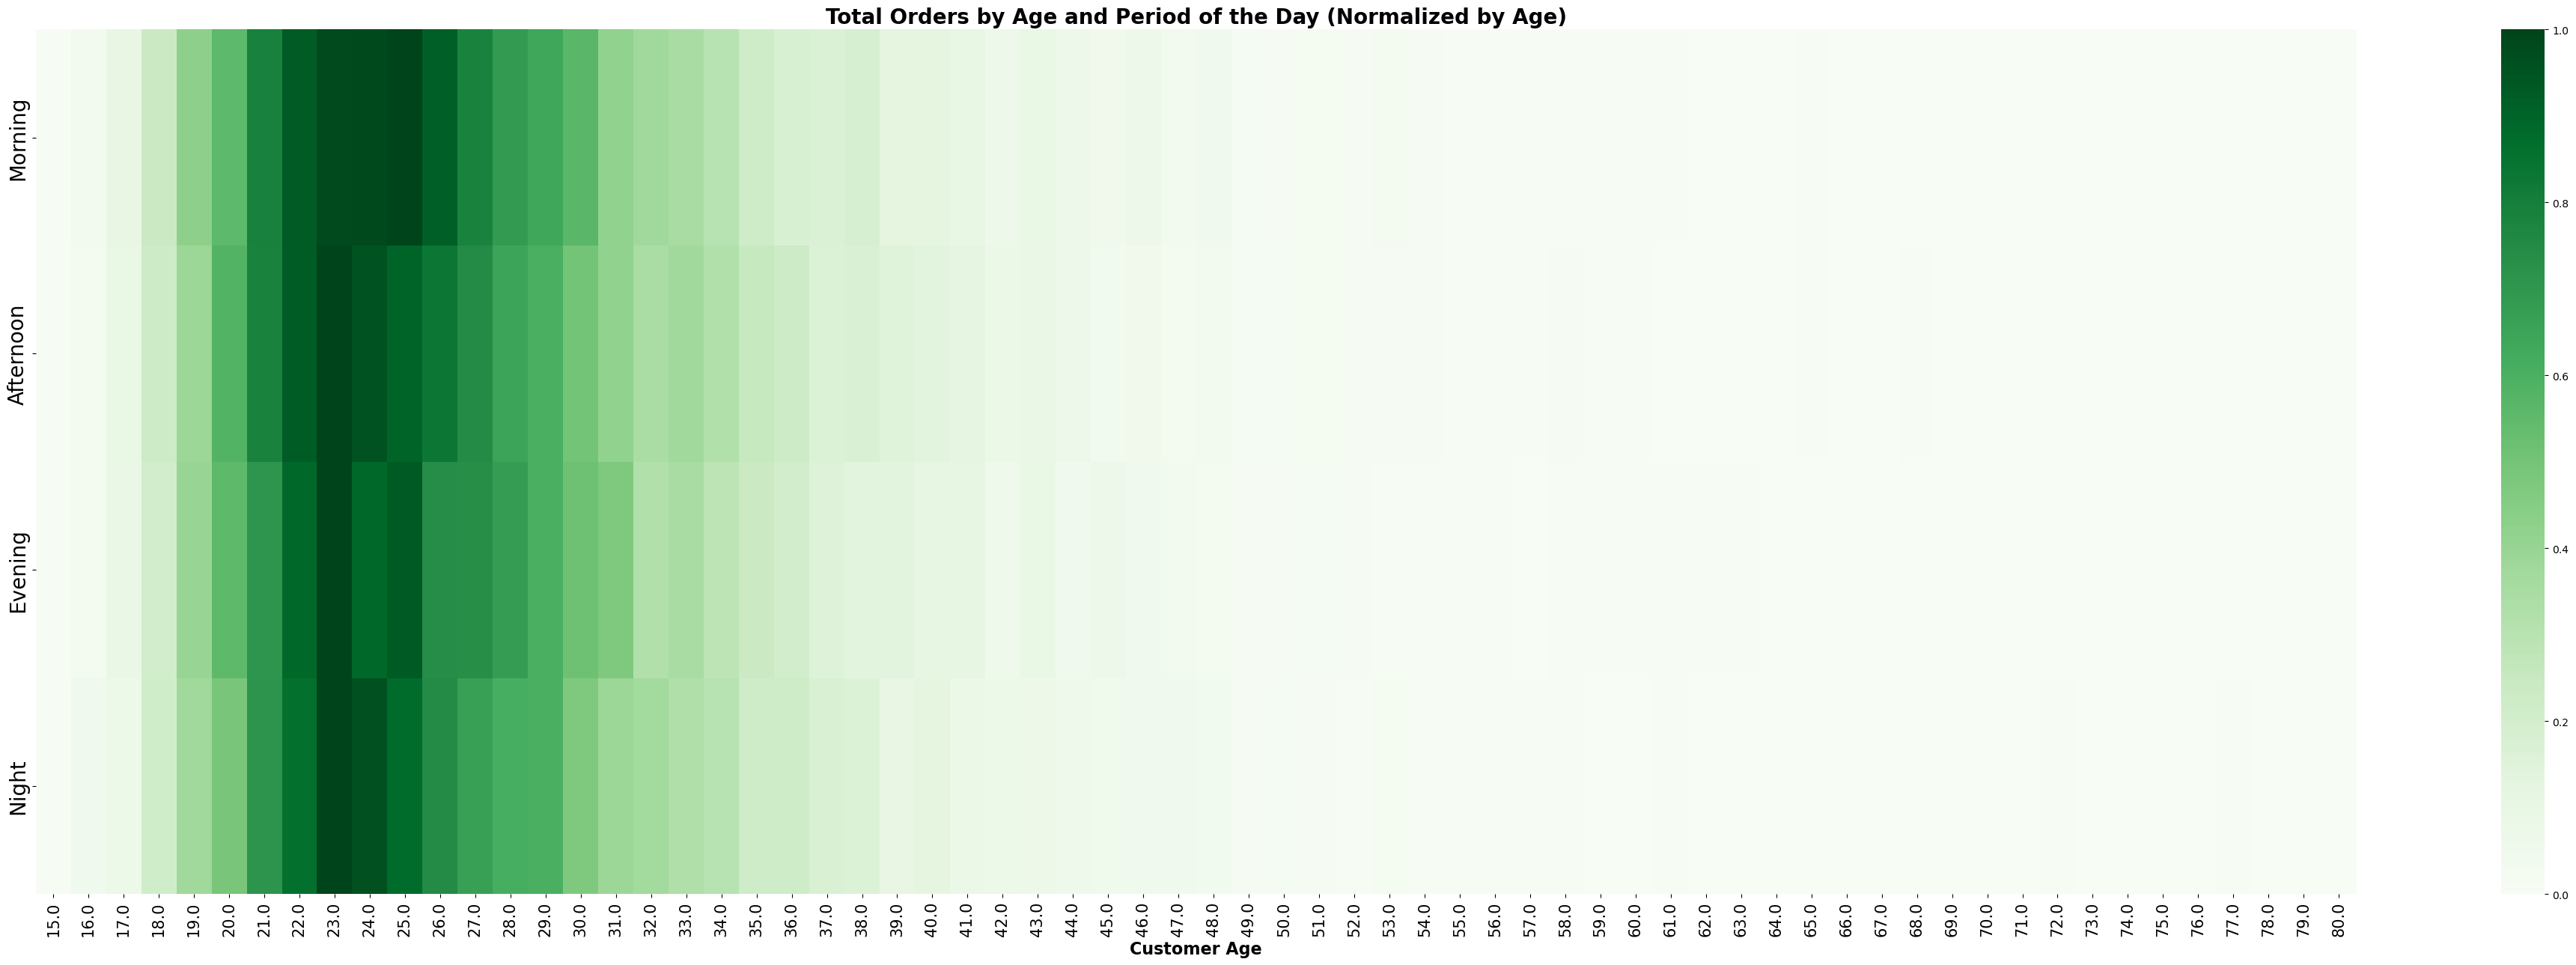

In [28]:
# Building a single dataframe with the mean orders for the various parts of the days.
df_age_morning = pd.DataFrame(df.groupby('customer_age')[morning_hours].sum().sum(axis=1), columns = ['Morning'])
df_age_afternoon = pd.DataFrame( df.groupby('customer_age')[afternoon_hours].sum().sum(axis=1), columns = ['Afternoon'])
df_age_evening = pd.DataFrame(df.groupby('customer_age')[evening_hours].sum().sum(axis=1), columns = ['Evening'])
df_age_night = pd.DataFrame( df.groupby('customer_age')[night_hours].sum().sum(axis=1), columns = ['Night'])
data = pd.concat([df_age_morning, df_age_afternoon, df_age_evening, df_age_night], axis=1)

# Create a scaler instance for Min-Max normalization
scaler = MinMaxScaler()
# Normalize the 'data' dataframe (column-wise normalization)
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)


plt.figure(figsize=(50, 15))
sns.heatmap(data_normalized.T, cmap='Greens')

# Set title and axis labels with font adjustments
plt.title('Total Orders by Age and Period of the Day (Normalized by Age)', fontsize=20, fontweight='bold')
plt.xlabel('Customer Age', fontsize=16, fontweight='bold')

# Adjust tick label sizes directly
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=90)
plt.show()

The plot above also reinforces that the age of the customers does not affect the time they place their orders, as the age groups have an identical relative distribution, as we can see on the gradient.